<a href="https://colab.research.google.com/github/zhiyangg/aps360/blob/main/APS360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("suuu")

suu


In [26]:
import shutil
from pathlib import Path
data_path = Path("data/Dataset")

# Check if the directory exists
if data_path.exists() and data_path.is_dir():
    shutil.rmtree(data_path)
    print(f"Deleted the directory: {data_path}")
else:
    print(f"The directory {data_path} does not exist.")

Deleted the directory: data/Dataset


In [27]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "Dataset"

# If the image folder doesn't exist, download and prepare it
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)


  # Download your dataset
  with open(data_path / "Dataset.zip", "wb") as f:
      print(f"Downloading data...")
      request = requests.get("https://github.com/raymanhuang/aps360data/raw/main/Dataset.zip")
      f.write(request.content)

  # Unzip your dataset
  with zipfile.ZipFile(data_path / "Dataset.zip", "r") as zip_ref:
      print(f"Unzipping data...")
      zip_ref.extractall(data_path)

Did not find data/Dataset directory, creating one...
Unzipping data...


In [28]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 3 directories and 0 images in 'data/Dataset'.
There are 3 directories and 0 images in 'data/Dataset/val'.
There are 0 directories and 459 images in 'data/Dataset/val/without_mask'.
There are 0 directories and 459 images in 'data/Dataset/val/with_mask'.
There are 0 directories and 459 images in 'data/Dataset/val/mask_weared_incorrect'.
There are 3 directories and 0 images in 'data/Dataset/train'.
There are 0 directories and 2076 images in 'data/Dataset/train/without_mask'.
There are 0 directories and 2076 images in 'data/Dataset/train/with_mask'.
There are 0 directories and 2076 images in 'data/Dataset/train/mask_weared_incorrect'.
There are 3 directories and 0 images in 'data/Dataset/test'.
There are 0 directories and 459 images in 'data/Dataset/test/without_mask'.
There are 0 directories and 459 images in 'data/Dataset/test/with_mask'.
There are 0 directories and 459 images in 'data/Dataset/test/mask_weared_incorrect'.


In [29]:
# Setup train, val, testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
val_dir = image_path / "val"
train_dir, test_dir, val_dir

(PosixPath('data/Dataset/train'),
 PosixPath('data/Dataset/test'),
 PosixPath('data/Dataset/val'))

In [30]:
print(image_path)

data/Dataset


In [36]:
image_path_list = list(image_path.glob("*/*/*.png"))
print(image_path_list)

[PosixPath('data/Dataset/val/without_mask/900.png'), PosixPath('data/Dataset/val/without_mask/809.png'), PosixPath('data/Dataset/val/without_mask/823.png'), PosixPath('data/Dataset/val/without_mask/479.png'), PosixPath('data/Dataset/val/without_mask/481.png'), PosixPath('data/Dataset/val/without_mask/533.png'), PosixPath('data/Dataset/val/without_mask/561.png'), PosixPath('data/Dataset/val/without_mask/520.png'), PosixPath('data/Dataset/val/without_mask/867.png'), PosixPath('data/Dataset/val/without_mask/569.png'), PosixPath('data/Dataset/val/without_mask/682.png'), PosixPath('data/Dataset/val/without_mask/717.png'), PosixPath('data/Dataset/val/without_mask/529.png'), PosixPath('data/Dataset/val/without_mask/814.png'), PosixPath('data/Dataset/val/without_mask/700.png'), PosixPath('data/Dataset/val/without_mask/710.png'), PosixPath('data/Dataset/val/without_mask/847.png'), PosixPath('data/Dataset/val/without_mask/523.png'), PosixPath('data/Dataset/val/without_mask/793.png'), PosixPath('

Visualizing raw data

Random image path: data/Dataset/train/without_mask/2873.png
Image class: without_mask
Image height: 128
Image width: 128


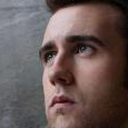

In [37]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.png"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

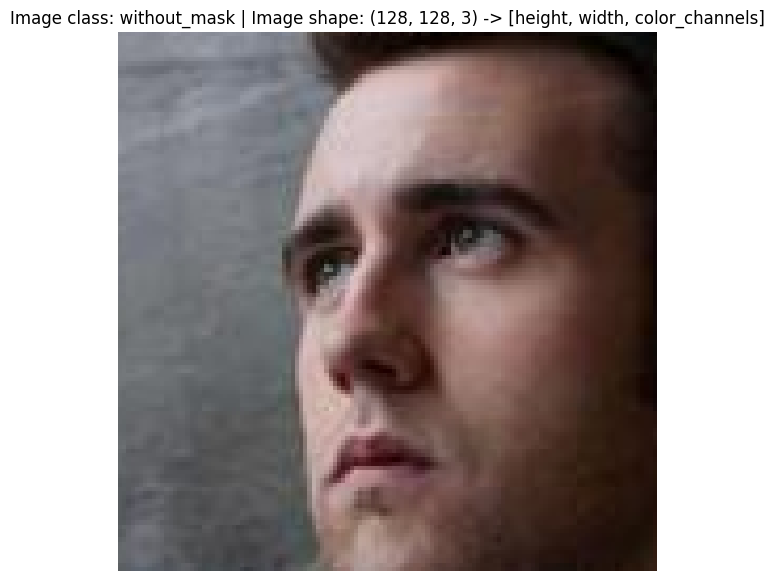

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Load the pre-trained MobileNetV2 model
model = models.mobilenet_v2(pretrained=True)

# Modify the classifier for binary classification
model.classifier[1] = nn.Linear(model.last_channel, 2)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [45]:
# Data loading and preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # These are the values used in ImageNet, hence we should normalize our data to these values too
])

train_dataset = ImageFolder(root=train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = ImageFolder(root=val_dir, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

test_dataset = ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


# Training Loop
num_epochs = 10  # Choose the number of epochs

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Finished Training!")

IndexError: ignored